In [1]:
import pandas as pd
import shap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  !pip install shap
# !pip install sklearn_pandas

In [2]:
df = pd.read_csv('../data_cleaning/df_cleaned.csv')

In [3]:
df.describe()

,journey_year,journey_month,journey_day,weekday,dep_hour,dep_min,Arrival_hour,Arrival_min,duration_hours,duration_mins,Duration_in_mins,price
count,10462.0,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,2019.0,4.701491,13.463200,2.935576,12.478494,24.404989,13.387689,24.719939,10.026190,28.210189,629.781591,9027.790289
std,0.0,1.163802,8.467493,2.006599,5.727227,18.815719,6.855547,16.570450,8.378023,16.879185,500.699045,4624.849541
min,2019.0,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1760.000000
25%,2019.0,3.000000,6.000000,1.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,170.000000,5225.000000
50%,2019.0,5.000000,12.000000,3.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,505.000000,8267.000000
75%,2019.0,6.000000,21.000000,5.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,910.000000,12345.750000
max,2019.0,6.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,2860.000000,79513.000000


In [4]:
train, test = train_test_split(df, train_size = 0.7, random_state = 123)

In [5]:
train.shape

(7323, 21)

In [6]:
test.shape

(3139, 21)

In [7]:
train.sample(5)

,airline,embarked,destination,Route,stops,journey_year,journey_month,journey_day,weekday,dep_hour,...,departure_period,Arrival_hour,Arrival_min,arrival_period,Arrived_next_day,duration_hours,duration_mins,Duration_in_mins,price,additional_info
3013,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,2019,6,24,0,11,...,morning,19,15,evening,False,7,45,465,14849,No info
5122,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,2019,3,6,2,20,...,evening,9,30,morning,True,12,55,775,17262,No info
9725,GoAir,Banglore,Delhi,BLR → DEL,non-stop,2019,4,1,0,20,...,evening,23,40,night,False,2,45,165,4240,No info
8385,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,2019,6,1,5,19,...,evening,19,15,evening,True,24,15,1455,8793,No info
6135,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,2019,3,6,2,8,...,early morning,23,0,night,False,14,5,845,16737,No info


In [8]:
train.columns

Index(['airline', 'embarked', 'destination', 'Route', 'stops', 'journey_year',
       'journey_month', 'journey_day', 'weekday', 'dep_hour', 'dep_min',
       'departure_period', 'Arrival_hour', 'Arrival_min', 'arrival_period',
       'Arrived_next_day', 'duration_hours', 'duration_mins',
       'Duration_in_mins', 'price', 'additional_info'],
      dtype='object')

In [28]:
X_train = train[['airline', 'embarked', 'destination', 'stops',
       'journey_month', 'journey_day', 'weekday', 'dep_hour',  'Arrival_hour', 
       'Duration_in_mins']]
y_train = train["price"]

In [24]:
X_train.sample(5)

,airline,embarked,destination,stops,journey_month,journey_day,weekday,dep_hour,Arrival_hour,Arrived_next_day,Duration_in_mins
3771,Multiple carriers,Delhi,Cochin,1 stop,6,3,0,12,21,False,490
9131,Jet Airways,Banglore,Delhi,non-stop,4,24,2,19,22,False,180
1938,IndiGo,Mumbai,Hyderabad,non-stop,5,18,5,21,22,False,90
353,Air India,Banglore,New Delhi,1 stop,3,1,4,11,9,True,1330
2392,Jet Airways,Delhi,Cochin,1 stop,3,3,6,2,4,True,1570


In [29]:
#create linear regression model object
lm_mod = LinearRegression()

In [31]:
#fit linear model with all features 
lm_fit = lm_mod.fit(X_train, y_train)

ValueError: could not convert string to float: 'SpiceJet'

In [58]:
lm_fit.intercept_

8812.752970943046

In [59]:
lm_fit.coef_

array([-1.05316189e-02,  2.26688977e+02, -6.15313433e+02,  1.91011573e+02,
        3.67495153e+03,  2.16004992e-12, -1.04382212e+02, -9.02536403e+01,
        9.57027401e+01, -3.10244407e+00,  9.09494702e-13, -5.24910435e+02,
       -6.05750672e+00, -7.03266693e+01, -7.63932982e+00,  1.08037361e+02,
       -1.55155544e+01])

In [62]:
shap.initjs()

In [72]:
explainer = shap.Explainer(lm_mod.predict, X_train)

In [73]:
shap_values = explainer(X_train)

Permutation explainer: 7324it [26:11,  4.66it/s]                            


In [82]:
shap_values

.values =
array([[-4.89764510e+01,  2.51624764e+02, -3.01503582e+02, ...,
         8.51785275e+01, -5.72598011e+02,  1.55155544e+00],
       [ 4.31330876e+01,  1.15838067e+03,  9.29123283e+02, ...,
        -1.05804718e+02, -7.88672732e+02, -3.08759534e+02],
       [-3.10937622e+01,  2.49357874e+01,  3.13809851e+02, ...,
         4.69818784e+01,  3.99738234e+02,  1.56707100e+02],
       ...,
       [-6.46852031e-01,  2.49357874e+01,  3.13809851e+02, ...,
         8.51785275e+01,  1.83663513e+02,  3.89440417e+02],
       [ 4.06897520e+01, -4.28442166e+02, -3.01503582e+02, ...,
        -2.94114198e+01,  5.07775595e+02,  3.89440417e+02],
       [ 1.68566985e+01,  4.78313741e+02, -3.01503582e+02, ...,
         1.99768475e+02,  1.83663513e+02,  1.55155544e+00]])

.base_values =
array([8818.78678851, 8818.78678851, 8818.78678851, ..., 8818.78678851,
       8818.78678851, 8818.78678851])

.data =
array([[9863,    3,    2, ...,   15,    4,   30],
       [1117,    7,    0, ...,   40,    2,   50]

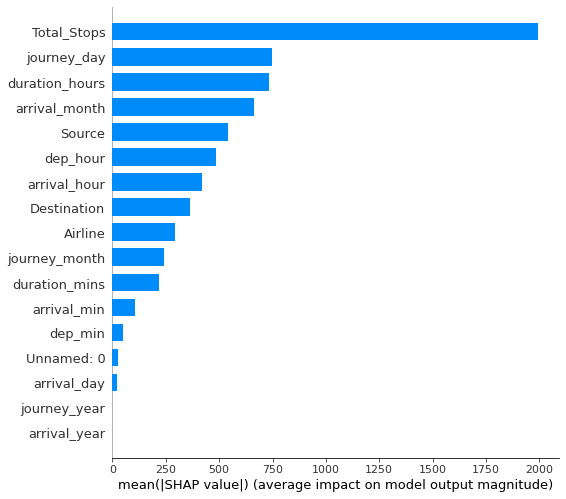

In [102]:
shap.summary_plot(shap_values, X_train, plot_type = 'bar')

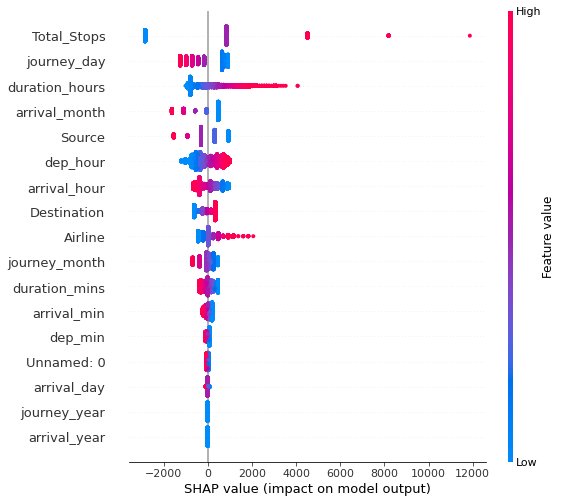

In [104]:
shap.summary_plot(shap_values, X_train)

In [106]:
shap.force_plot(
    explainer.expected_values,
    shap_values[77, :],
    X_train.iloc[77, :]
)

AttributeError: 'Permutation' object has no attribute 'expected_values'

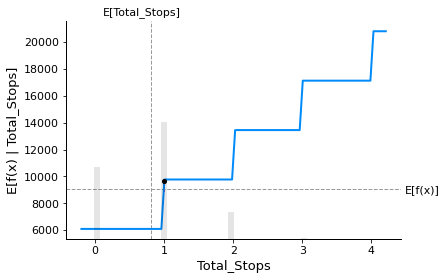

In [100]:
shap.partial_dependence_plot(
    "Total_Stops", lm_mod.predict, X_train, model_expected_value = True,
    feature_expected_value = True, ice = False, 
    shap_values=shap_values[100:101,:]
)

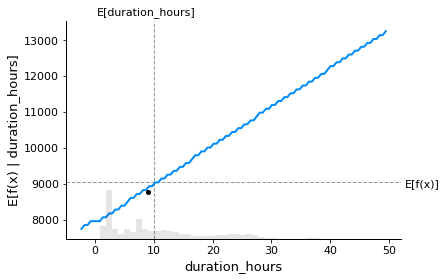

In [94]:
shap.partial_dependence_plot(
    "duration_hours", lm_mod.predict, X_train, model_expected_value = True,
    feature_expected_value = True, ice = False, 
    shap_values=shap_values[100:101,:]
)

In [80]:
shap_values[100]

.values =
array([  30.10547505,  478.31374095, -301.503582  ,  343.82083117,
        845.23885194,    0.        ,  -54.27875035,  649.82620997,
       -150.25330189,  -48.86349406,    0.        ,  482.91760044,
         -5.39118098, -513.38468588,  199.76847471,  -32.41120818,
        156.70709992])

.base_values =
8818.786788506297

.data =
array([2354,    4,    2,    5,    1, 2019,    6,    6,   11,   40, 2022,
          2,   15,   21,    0,    9,   20])

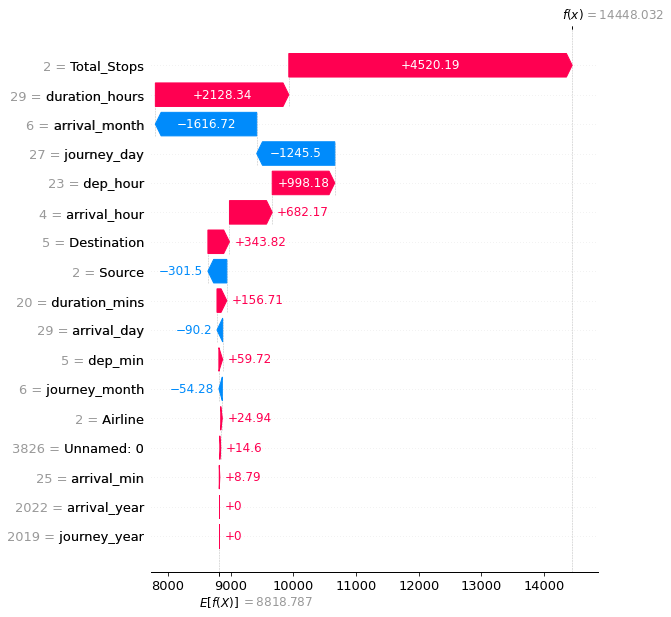

In [93]:
shap.plots.waterfall(shap_values[50], max_display = 17 )

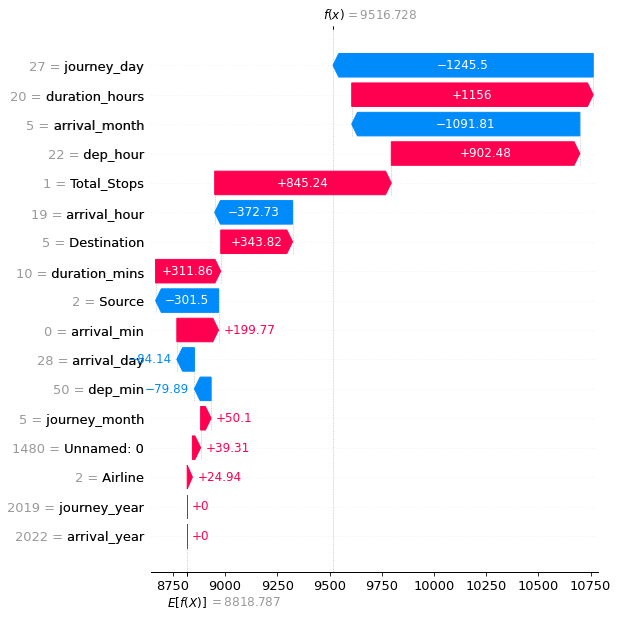

In [103]:
shap.plots.waterfall(shap_values[77], max_display = 17 )

In [101]:
shap.plots.condenced(shap_values[100], max_display = 17 )

AttributeError: module 'shap.plots' has no attribute 'condenced'

In [65]:
def sample_feature_importance(idx, type = 'condensed'):
    if type == 'condensed':
        return shap.plots.force(shape_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shape_values[idx])
    else: 
        return "Return valid visual ('condensed', 'waterfall')"

In [66]:
sample_feature_importance(0, 'waterfall')

NameError: name 'shape_values' is not defined

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      10462 non-null  int64 
 1   Airline         10462 non-null  int64 
 2   Source          10462 non-null  int64 
 3   Destination     10462 non-null  int64 
 4   Route           10462 non-null  object
 5   Total_Stops     10462 non-null  int64 
 6   Price           10462 non-null  int64 
 7   journey_year    10462 non-null  int64 
 8   journey_month   10462 non-null  int64 
 9   journey_day     10462 non-null  int64 
 10  dep_hour        10462 non-null  int64 
 11  dep_min         10462 non-null  int64 
 12  arrival_year    10462 non-null  int64 
 13  arrival_month   10462 non-null  int64 
 14  arrival_day     10462 non-null  int64 
 15  arrival_hour    10462 non-null  int64 
 16  arrival_min     10462 non-null  int64 
 17  duration_hours  10462 non-null  object
 18  durati